In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score
import sklearn.metrics as metrics
from collections import OrderedDict
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, f1_score, accuracy_score
%matplotlib inline

In [18]:
from sklearn import set_config
set_config(print_changed_only=False)

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
df=pd.read_csv('train.csv')

In [14]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [15]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

<AxesSubplot:>

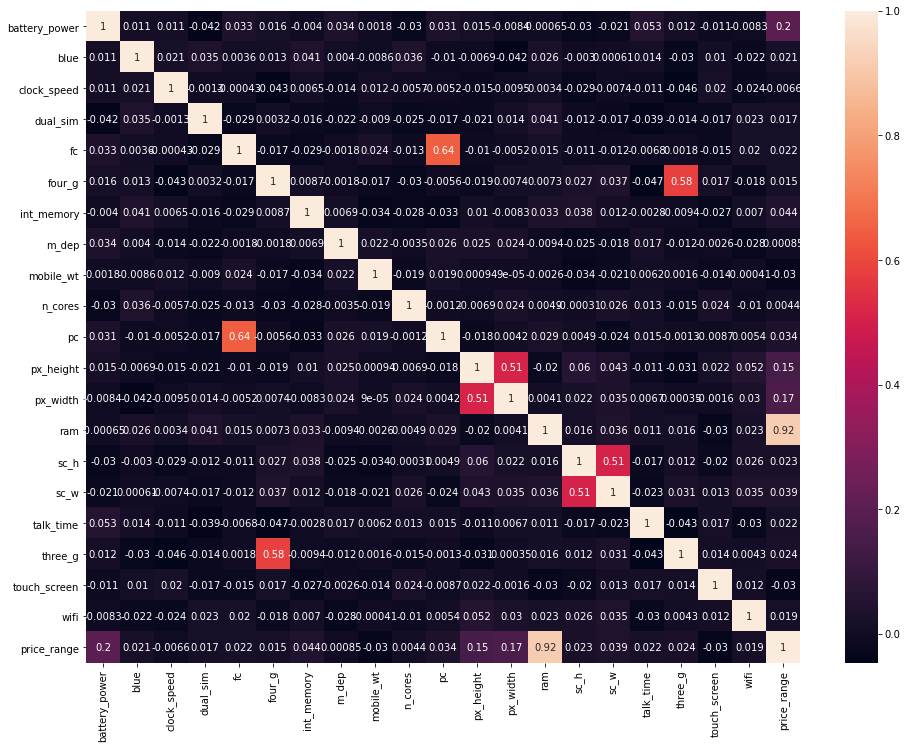

In [16]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(),annot=True)

In [20]:
df['price_range'].value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

In [21]:
X = df.drop(columns='price_range')
y = df['price_range']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,stratify=y,random_state = 1)

# knn #

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn_cf=KNeighborsClassifier()
knn_cf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [26]:
print(knn_cf.score(X_train,y_train))

0.95


In [27]:
param_KNN = {"n_neighbors" : [5, 10, 25, 35, 75],
            "weights" : ["uniform", "distance"],
            "p" : [1,2]}

model_knn = GridSearchCV(estimator=knn_cf, param_grid=param_KNN, n_jobs = -1, cv = 5, verbose=1 )
model_knn.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': [5, 10, 25, 35, 75], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [28]:
print(model_knn.score(X_train,y_train))

1.0


In [80]:
y_pred_knn = knn_cf.predict(X_test)

In [83]:
acc_knn = accuracy_score(y_test, y_pred_knn)
acc_knn

0.9175

In [109]:
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])

df_cm = pd.DataFrame(data=cm, columns=['Pred 1', 'Pred 0'], index = ['Akt 1', 'Akt 0'])

prec_knn = precision_score(y_test, y_pred, average='macro')

rec_knn = recall_score(y_test, y_pred, pos_label=1,average='macro')

f1_knn = f1_score(y_test, y_pred,average='macro')

recall_score(y_test, y_pred, pos_label=0,average='macro')

print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       100
           1       0.93      0.92      0.92       100
           2       0.84      0.90      0.87       100
           3       0.94      0.88      0.91       100

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



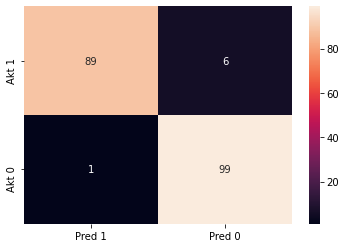

In [34]:
y_KNN = model_knn.predict(X_test)
cm_KNN = confusion_matrix(y_test, y_KNN, labels=[1, 0])
df_KNN = pd.DataFrame(data=cm_KNN, columns=['Pred 1', 'Pred 0'], index = ['Akt 1', 'Akt 0'])
sns.heatmap(df_KNN, annot=True,fmt='d')
plt.show()

# Random Forest #

In [53]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [54]:
print(RF.score(X_train,y_train))

1.0


In [55]:
param_RF = {"n_estimators" : [100, 200],
          "max_depth" : [5, 10],
          "min_samples_split" : [2, 9],
          "min_samples_leaf" : [1, 2],
          "max_features" : [None, .8]}

model_RF = GridSearchCV(estimator=RF, param_grid=param_RF, cv = 4, n_jobs=-1, verbose=1)
model_RF.fit(X_train, y_train)

Fitting 4 folds for each of 32 candidates, totalling 128 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:   54.9s finished


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [56]:
print(model_RF.score(X_train, y_train))

0.991875


In [57]:
y_pred_rf = model_RF.predict(X_test)

In [86]:
acc_RF = accuracy_score(y_test, y_pred_rf)
acc_RF

0.875

In [108]:
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])

df_cm = pd.DataFrame(data=cm, columns=['Pred 1', 'Pred 0'], index = ['Akt 1', 'Akt 0'])

prec_RF = precision_score(y_test, y_pred, average='macro')

rec_RF = recall_score(y_test, y_pred, pos_label=1,average='macro')

f1_RF = f1_score(y_test, y_pred,average='macro')

recall_score(y_test, y_pred, pos_label=0,average='macro')

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       100
           1       0.89      0.86      0.87       100
           2       0.80      0.83      0.81       100
           3       0.89      0.85      0.87       100

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.87       400
weighted avg       0.88      0.88      0.87       400



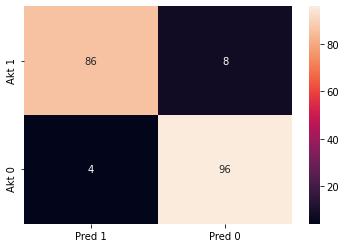

In [63]:
y_RF = model_RF.predict(X_test)
cm_RF = confusion_matrix(y_test, y_RF, labels=[1, 0])
df_RF = pd.DataFrame(data=cm_RF, columns=['Pred 1', 'Pred 0'], index = ['Akt 1', 'Akt 0'])
sns.heatmap(df_RF, annot=True,fmt='d')
plt.show()

# SVC # 

In [65]:
from sklearn.svm import SVC
SVC=SVC()
SVC.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [66]:
print(SVC.score(X_train,y_train))

0.95375


In [116]:
param_SVC = {"C" : [3, 5, 7, 9, 11],
            "degree" : [5,7,9,11,13],
            "gamma" : ['scale'],
            "decision_function_shape":['ovr']}

model_SVC = GridSearchCV(estimator=SVC, param_grid=param_SVC, n_jobs = -1, cv = 5, verbose=1 )
model_SVC.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    4.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [3, 5, 7, 9, 11],
                         'decision_function_shape': ['ovr'],
                         'degree': [5, 7, 9, 11, 13], 'gamma': ['scale']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [117]:
print(model_SVC.score(X_train,y_train))

0.96375


In [118]:
y_pred_SVC = SVC.predict(X_test)

In [119]:
acc_SVC = accuracy_score(y_test, y_pred_SVC)
acc_SVC

0.965

In [120]:
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])

df_cm = pd.DataFrame(data=cm, columns=['Pred 1', 'Pred 0'], index = ['Akt 1', 'Akt 0'])

prec_SVC = precision_score(y_test, y_pred, average='macro')

rec_SVC = recall_score(y_test, y_pred, pos_label=1,average='macro')

f1_SVC = f1_score(y_test, y_pred,average='macro')

recall_score(y_test, y_pred, pos_label=0,average='macro')

print(classification_report(y_test, y_pred_SVC))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       100
           1       0.97      0.94      0.95       100
           2       0.97      0.93      0.95       100
           3       0.96      0.99      0.98       100

    accuracy                           0.96       400
   macro avg       0.97      0.97      0.96       400
weighted avg       0.97      0.96      0.96       400



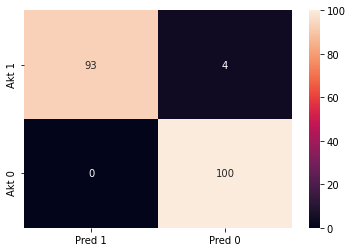

In [121]:
y_SVC = model_SVC.predict(X_test)
cm_SVC = confusion_matrix(y_test, y_SVC, labels=[1, 0])
df_SVC = pd.DataFrame(data=cm_SVC, columns=['Pred 1', 'Pred 0'], index = ['Akt 1', 'Akt 0'])
sns.heatmap(df_SVC, annot=True,fmt='d')
plt.show()

In [122]:
data = {
    "KNN" : [acc_knn, prec_knn, rec_knn, f1_knn],
    "RF" : [acc_RF, prec_RF, rec_RF, f1_RF],
    "SVC" : [acc_SVC, prec_SVC, rec_SVC, f1_SVC]
}
pd.DataFrame(data=data, index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

,KNN,RF,SVC
Accuracy,0.917500,0.875000,0.965000
Precision,0.965131,0.965131,0.965131
Recall,0.965000,0.965000,0.965000
F1 Score,0.964764,0.964764,0.964764
